<a href="https://colab.research.google.com/github/Solrak97/autoencoder-cnn/blob/main/autoencoder_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación de un autoencoder para reducción de la dimensionalidad sobre datos de gatos y perros
Con la finalidad de reducir la dimensionalidad de los datos de entrada, se busca crear un modelo que permita de manera automatica seleccionar los atributos más importantes de una imagen.
Para esto podemos crear un modelo basado en redes neuronales, debido a que este será un problema de reducción de dimensionalidad para imagenes, sería buena idea utilizar como base una red neuronal convolusional, pero esto se mantendrá como una mejora a realizar posteriormente pues de momento se desea unicamente ejecutar un demo de prueba.

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download chetankv/dogs-cats-images
! unzip dogs-cats-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

## Carga de las librerías necesarias para realizar el proceso

In [3]:
import torch
from torch.nn import Module, Conv2d, MaxPool2d, ConvTranspose2d
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.nn as nn

import os
from os import walk

import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Construcción del modelo
### Construcción del autoencoder

In [4]:
class Autoencoder(Module):
    
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.conv1 = Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding = 1)
        self.conv2 = Conv2d(in_channels=6, out_channels=18, kernel_size=5, padding = 1)
        self.conv3 = Conv2d(in_channels=18, out_channels=54, kernel_size=5, padding = 1)
        
        # Decoder
        self.tconv1 = ConvTranspose2d(in_channels=54, out_channels=18, kernel_size=4, stride = 2)
        self.tconv2 = ConvTranspose2d(in_channels=18, out_channels=6, kernel_size=4, stride = 2)
        self.tconv3 = ConvTranspose2d(in_channels=6, out_channels=3, kernel_size=6, stride = 2)
        
        self.pool = MaxPool2d(2, 2)
    
    
    
    def encode(self, x):
        # Encoder
        x = F.leaky_relu(self.conv1(x), negative_slope=1e-3)
        x = self.pool(x)
        x = F.leaky_relu(self.conv2(x), negative_slope=1e-3)
        x = self.pool(x)
        x = F.leaky_relu(self.conv3(x), negative_slope=1e-3)
        enc = self.pool(x)
        return enc
    
    
    def decode(self, x):
        # Decoder
        x = F.relu(self.tconv1(x))
        x = F.relu(self.tconv2(x))
        dec = torch.sigmoid(self.tconv3(x))
        return dec 
    
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)     
        return x

## Carga de los datos a modelar

In [5]:
transform = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

dataset = datasets.ImageFolder('/content/dog vs cat/dataset/training_set', transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=1000, shuffle=True)

## Entrenamiento del modelo

In [ ]:
model = Autoencoder()
model = model.to(device)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)



n_epochs = 100

for epoch in range(1, n_epochs+1):
    train_loss = 0.0

    for data in dataloader:
        images, _ = data
        images = images.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, images)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*images.size(0)

        del images
        torch.cuda.empty_cache
          
    train_loss = train_loss/len(dataloader)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))

Epoch: 1 	Training Loss: 693.604335
Epoch: 2 	Training Loss: 690.357290
Epoch: 3 	Training Loss: 674.440950
Epoch: 4 	Training Loss: 644.159742
Epoch: 5 	Training Loss: 615.192659
Epoch: 6 	Training Loss: 594.275512
Epoch: 7 	Training Loss: 585.723899
Epoch: 8 	Training Loss: 581.139900
Epoch: 9 	Training Loss: 578.309037
Epoch: 10 	Training Loss: 576.111861
Epoch: 11 	Training Loss: 574.524552
Epoch: 12 	Training Loss: 573.277973
Epoch: 13 	Training Loss: 572.316632
Epoch: 14 	Training Loss: 571.466453
Epoch: 15 	Training Loss: 570.830040
Epoch: 16 	Training Loss: 569.750942
Epoch: 17 	Training Loss: 568.815805
Epoch: 18 	Training Loss: 568.196312
Epoch: 19 	Training Loss: 567.608878
Epoch: 20 	Training Loss: 567.518741
Epoch: 21 	Training Loss: 567.356765
Epoch: 22 	Training Loss: 566.372648
Epoch: 23 	Training Loss: 565.528043
Epoch: 24 	Training Loss: 565.065280
Epoch: 25 	Training Loss: 564.472094
Epoch: 26 	Training Loss: 563.947849
Epoch: 27 	Training Loss: 563.461371
Epoch: 28 

## Guardar modelo

In [ ]:
torch.save(model.state_dict(), f'Autoencoder.pt')

## Cargar modelo

In [6]:
model = Autoencoder()
model.load_state_dict(torch.load('/content/Autoencoder.pt'))

<All keys matched successfully>

## Visualización de resultados

Original Images


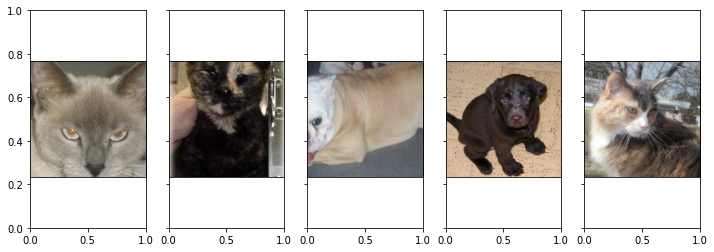

Reconstructed Images


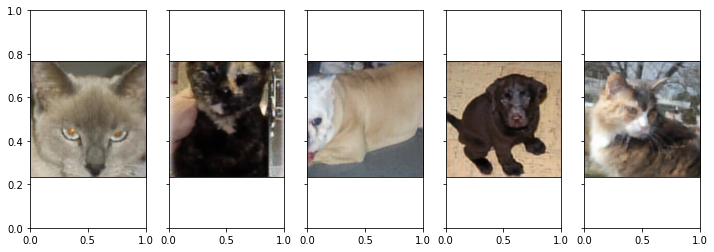

In [32]:
dataset = datasets.ImageFolder('/content/dog vs cat/dataset/training_set', transform=transform)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

#Batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

#Sample outputs
output = model(images)

output = output.view(32, 3, 224, 224)
output = output.detach()

#Original Images
print("Original Images")
plt.show()
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(images[idx].permute(1,2,0))
plt.show()

#Reconstructed Images
print('Reconstructed Images')
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(12,4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(output[idx].permute(1,2,0))
plt.show()

## Codificación de imagenes

Entrada: [3, 224, 224]

Salida:  [54, 26, 26]

Reducción del 75%

Reconstrucción con 24.25% de la información

In [29]:
img = test_loader.dataset[0]
coded = model.encode(img[0])

print(f'''
      Image size:     {img[0].shape}
      Encoded size:   {coded.shape}
      ''')


      Image size:     torch.Size([3, 224, 224])
      Encoded size:   torch.Size([54, 26, 26])
      
